WIP: Plot hypergraph as sets connecting nodes. Inspired by PoahVis and UpSet.

In [2]:
%reload_ext autoreload
%autoreload 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [145]:
data = pd.read_csv('models/gpt3/hypergraph.csv', dtype='category')

data['edge'] = 1.0
adj = data.pivot(columns='construct', values='edge', index='task')
adj.fillna(0, inplace=True)

adj = adj[adj.sum().sort_values(ascending=False).index]
adj = adj.loc[adj.sum(axis=1).sort_values(ascending=False).index]

x, y = np.where(adj == 1.0)

In [146]:
tasks = adj.index.unique()
constructs = adj.columns.unique()

n_tasks = len(tasks) # y
n_constructs = len(constructs) # y

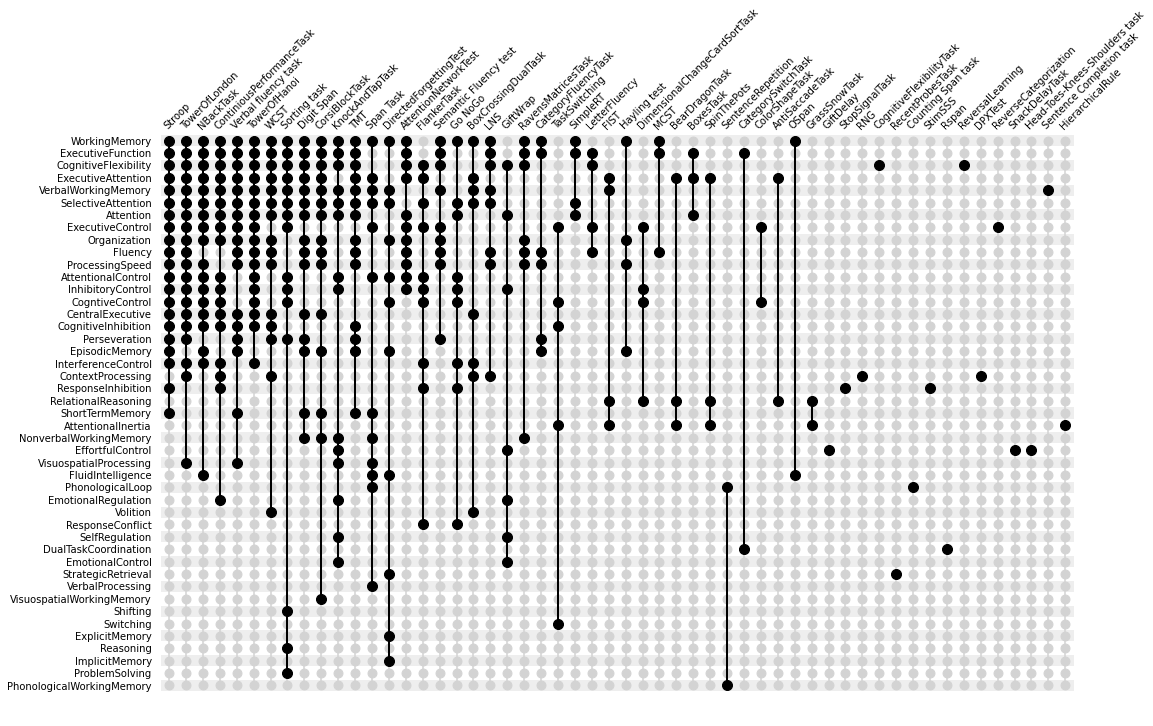

In [148]:
grid = np.mgrid.__getitem__([slice(0, n_tasks, 1), slice(0, n_constructs, 1)]).reshape(2,-1).T
grid_df = pd.DataFrame(grid, columns=['x','y'])

fig, ax = plt.subplots(figsize=(n_tasks / 3, n_constructs / 4))

# background dots 
ax.scatter(grid_df['x'], grid_df['y'], s=80, color='lightgray', zorder=1)

# background lines
for xi in range(n_tasks):
    ax.plot([xi,xi], [0,n_constructs-1], color='lightgray', zorder=2)

# black dots
ax.scatter(x, y, color='black', s=100, zorder=3)

# black lines
for i in range(n_tasks):
    i_idx = np.where(x==i)
    _x = y[i_idx]
    ax.plot([i, i], [_x.min(),_x.max()],
            lw=2, color='black', zorder=4)

# shading
for i in range(0, n_constructs, 2):
    rect = plt.Rectangle((-.5, i-.45), n_tasks, .9, facecolor='#eeeeee', lw=0, zorder=0)
    ax.add_patch(rect)

ax.xaxis.tick_top()
ax.invert_yaxis()

ax.grid(False)
ax.set_frame_on(False)

ax.tick_params(axis='both', which='both',length=0)

plt.xticks(range(n_tasks))
plt.yticks(range(n_constructs))

[t.set_y(.955) for t in ax.xaxis.get_ticklabels()]
[t.set_x(0.04) for t in ax.yaxis.get_ticklabels()]

ax.set_xticklabels([l.split('_-')[0] if '_-' in l else l.replace('_',' ') for l in tasks])
ax.set_yticklabels([l.split('_-')[0] if '_-' in l else l.replace('_',' ') for l in constructs])

plt.xticks(rotation=45, ha='left', rotation_mode='anchor')

plt.show()